In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import random, os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

# 데이터 불러오기

In [2]:
df = pd.read_csv("bank-direct-marketing-campaigns.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

# 데이터 전처리

In [4]:
# 중복 제거
print(df.shape)
df = df.drop_duplicates(keep='last')
print(df.shape)

(41188, 20)
(39404, 20)


In [5]:
# 10대 별로 나누어 분석
df['age'] = df['age']//10
df

/var/folders/wc/qvzfbr3n257938b_6zb2g1q40000gn/T/ipykernel_12063/3632923213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age']//10


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,5,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,5,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,4,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,7,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,4,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,5,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,4,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
pd.crosstab(df["default"], df["y"])

y,no,yes
default,,
no,26979,4156
unknown,7824,442
yes,3,0


In [7]:
df = df.replace({'y':{'no':0, 'yes':1}})
df = df.replace({'default': {'yes': 'unknown'}})
df = df.replace({'default':{'no':0, 'unknown':1}})
df = df.replace({'pdays': {999: -1}})
# df = df.replace({'month': {'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 
#                            'nov':11, 'dec':12, 'mar':3, 'apr':4, 'sep':9}})
df = df.replace({'contact':{'telephone':0, 'cellular':1}})
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,5,housemaid,married,basic.4y,0,no,no,0,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,5,services,married,high.school,1,no,no,0,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,4,admin.,married,basic.6y,0,no,no,0,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,5,services,married,high.school,0,no,yes,0,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,4,services,married,basic.9y,1,no,no,0,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,7,retired,married,professional.course,0,yes,no,1,nov,fri,1,-1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,4,blue-collar,married,professional.course,0,no,no,1,nov,fri,1,-1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,5,retired,married,university.degree,0,yes,no,1,nov,fri,2,-1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,4,technician,married,professional.course,0,no,no,1,nov,fri,1,-1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


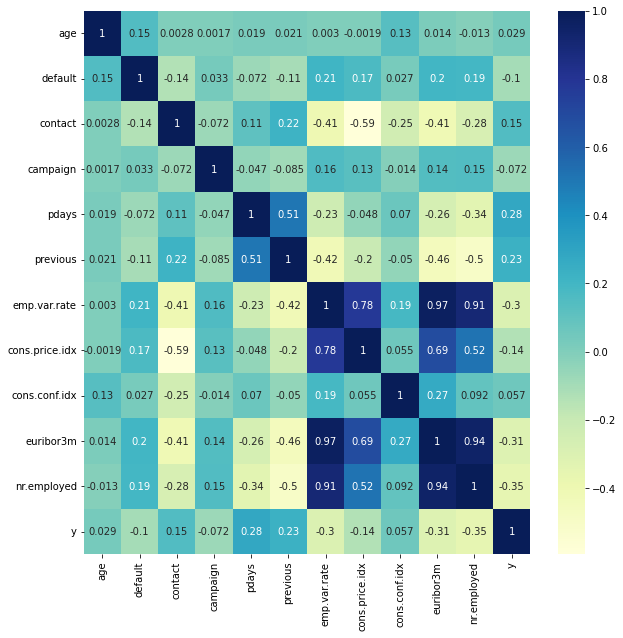

In [8]:
# 상관관계 확인
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap='YlGnBu')
plt.show()

In [9]:
# 다중공선성 변수 제거 (emp.var.rate와 높은 상관 관계)
df.drop('euribor3m', axis=1 ,inplace=True)
df.drop('cons.price.idx', axis=1 ,inplace=True)
df.drop('emp.var.rate', axis=1 ,inplace=True)
df.drop('nr.employed', axis=1 ,inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,y
0,5,housemaid,married,basic.4y,0,no,no,0,may,mon,1,-1,0,nonexistent,-36.4,0
1,5,services,married,high.school,1,no,no,0,may,mon,1,-1,0,nonexistent,-36.4,0
3,4,admin.,married,basic.6y,0,no,no,0,may,mon,1,-1,0,nonexistent,-36.4,0
4,5,services,married,high.school,0,no,yes,0,may,mon,1,-1,0,nonexistent,-36.4,0
5,4,services,married,basic.9y,1,no,no,0,may,mon,1,-1,0,nonexistent,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,7,retired,married,professional.course,0,yes,no,1,nov,fri,1,-1,0,nonexistent,-50.8,1
41184,4,blue-collar,married,professional.course,0,no,no,1,nov,fri,1,-1,0,nonexistent,-50.8,0
41185,5,retired,married,university.degree,0,yes,no,1,nov,fri,2,-1,0,nonexistent,-50.8,0
41186,4,technician,married,professional.course,0,no,no,1,nov,fri,1,-1,0,nonexistent,-50.8,1


In [10]:
# 데이터 분석에 도움되지 않는 변수 삭제
df.drop('day_of_week', axis=1 ,inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,cons.conf.idx,y
0,5,housemaid,married,basic.4y,0,no,no,0,may,1,-1,0,nonexistent,-36.4,0
1,5,services,married,high.school,1,no,no,0,may,1,-1,0,nonexistent,-36.4,0
3,4,admin.,married,basic.6y,0,no,no,0,may,1,-1,0,nonexistent,-36.4,0
4,5,services,married,high.school,0,no,yes,0,may,1,-1,0,nonexistent,-36.4,0
5,4,services,married,basic.9y,1,no,no,0,may,1,-1,0,nonexistent,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,7,retired,married,professional.course,0,yes,no,1,nov,1,-1,0,nonexistent,-50.8,1
41184,4,blue-collar,married,professional.course,0,no,no,1,nov,1,-1,0,nonexistent,-50.8,0
41185,5,retired,married,university.degree,0,yes,no,1,nov,2,-1,0,nonexistent,-50.8,0
41186,4,technician,married,professional.course,0,no,no,1,nov,1,-1,0,nonexistent,-50.8,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39404 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            39404 non-null  int64  
 1   job            39404 non-null  object 
 2   marital        39404 non-null  object 
 3   education      39404 non-null  object 
 4   default        39404 non-null  int64  
 5   housing        39404 non-null  object 
 6   loan           39404 non-null  object 
 7   contact        39404 non-null  int64  
 8   month          39404 non-null  object 
 9   campaign       39404 non-null  int64  
 10  pdays          39404 non-null  int64  
 11  previous       39404 non-null  int64  
 12  poutcome       39404 non-null  object 
 13  cons.conf.idx  39404 non-null  float64
 14  y              39404 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 4.8+ MB


In [12]:
# One-Hot Encoding
df = pd.get_dummies(df, drop_first = True)
df

,age,default,contact,campaign,pdays,previous,cons.conf.idx,y,job_blue-collar,job_entrepreneur,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,5,0,0,1,-1,0,-36.4,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,5,1,0,1,-1,0,-36.4,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,0,0,1,-1,0,-36.4,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5,0,0,1,-1,0,-36.4,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,4,1,0,1,-1,0,-36.4,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,7,0,1,1,-1,0,-50.8,1,0,0,...,0,0,0,0,0,1,0,0,1,0
41184,4,0,1,1,-1,0,-50.8,0,1,0,...,0,0,0,0,0,1,0,0,1,0
41185,5,0,1,2,-1,0,-50.8,0,0,0,...,0,0,0,0,0,1,0,0,1,0
41186,4,0,1,1,-1,0,-50.8,1,0,0,...,0,0,0,0,0,1,0,0,1,0


# 랜덤 시드 고정

In [13]:
SEED = 42

def seed_everything(seed: int):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(SEED)

# data 분리

In [14]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(31523, 43) (31523,) (7881, 43) (7881,) (7881, 43) (7881,)


In [15]:
# over-sampling
print(pd.Series(y_train).value_counts())
smote = SMOTE(k_neighbors = 3, random_state=SEED)
X_train, y_train = smote.fit_resample(X_train, y_train)
pd.Series(y_train).value_counts()

0    27836
1     3687
Name: y, dtype: int64


0    27836
1    27836
Name: y, dtype: int64

# Model

## LogisticRegression

In [16]:
model_LR = LogisticRegression(C=0.001) # C : 규제 강도
model_LR.fit(X_train, y_train)
y_predLR = model_LR.predict(X_val)

print("Train data","\n",confusion_matrix(y_train, model_LR.predict(X_train)))
print("Validation data","\n",confusion_matrix(y_val, y_predLR))
print(classification_report(y_val, y_predLR, target_names=['no', 'yes']))

Train data 
 [[22016  5820]
 [ 8138 19698]]
Validation data 
 [[5520 1450]
 [ 412  499]]
              precision    recall  f1-score   support

          no       0.93      0.79      0.86      6970
         yes       0.26      0.55      0.35       911

    accuracy                           0.76      7881
   macro avg       0.59      0.67      0.60      7881
weighted avg       0.85      0.76      0.80      7881



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNeighborsClassifier

In [17]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)
y_predKNN = model_KNN.predict(X_val)

print("Train data","\n",confusion_matrix(y_train, model_KNN.predict(X_train)))
print("Validation data","\n",confusion_matrix(y_val, y_predKNN))
print(classification_report(y_val, y_predKNN, target_names=['no', 'yes']))

Train data 
 [[22561  5275]
 [ 1404 26432]]
Validation data 
 [[5287 1683]
 [ 393  518]]
              precision    recall  f1-score   support

          no       0.93      0.76      0.84      6970
         yes       0.24      0.57      0.33       911

    accuracy                           0.74      7881
   macro avg       0.58      0.66      0.58      7881
weighted avg       0.85      0.74      0.78      7881



## DecisionTreeClassifier

In [18]:
model_TREE = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=SEED)
model_TREE.fit(X_train, y_train)
y_predTREE = model_TREE.predict(X_val)

print("Train data","\n",confusion_matrix(y_train, model_TREE.predict(X_train)))
print("Validation data","\n",confusion_matrix(y_val, y_predTREE))
print(classification_report(y_val, y_predTREE, target_names=['no', 'yes']))

Train data 
 [[25413  2423]
 [10526 17310]]
Validation data 
 [[6298  672]
 [ 453  458]]
              precision    recall  f1-score   support

          no       0.93      0.90      0.92      6970
         yes       0.41      0.50      0.45       911

    accuracy                           0.86      7881
   macro avg       0.67      0.70      0.68      7881
weighted avg       0.87      0.86      0.86      7881



## SVC

In [19]:
model_SVC = SVC(kernel='linear')
model_SVC.fit(X_train, y_train)
y_predSVC = model_SVC.predict(X_val)

print("Train data","\n",confusion_matrix(y_train, model_TREE.predict(X_train)))
print("Validation data","\n",confusion_matrix(y_val, y_predSVC))
print(classification_report(y_val, y_predSVC, target_names=['no', 'yes']))

Train data 
 [[25413  2423]
 [10526 17310]]
Validation data 
 [[5559 1411]
 [ 461  450]]
              precision    recall  f1-score   support

          no       0.92      0.80      0.86      6970
         yes       0.24      0.49      0.32       911

    accuracy                           0.76      7881
   macro avg       0.58      0.65      0.59      7881
weighted avg       0.84      0.76      0.79      7881



## MLPClassifier

In [20]:
model_MLP = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter=200, activation='relu', alpha=3)
model_MLP.fit(X_train, y_train)
y_preMLP = model_MLP.predict(X_val)

print("Train data","\n",confusion_matrix(y_train, model_MLP.predict(X_train)))
print("Validation data","\n",confusion_matrix(y_val, y_preMLP))
print(classification_report(y_val, y_preMLP, target_names=['no', 'yes']))

Train data 
 [[20890  6946]
 [ 5553 22283]]
Validation data 
 [[5226 1744]
 [ 387  524]]
              precision    recall  f1-score   support

          no       0.93      0.75      0.83      6970
         yes       0.23      0.58      0.33       911

    accuracy                           0.73      7881
   macro avg       0.58      0.66      0.58      7881
weighted avg       0.85      0.73      0.77      7881



## RandomForestClassifier

In [ ]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
y_predRF = model_RF.predict(X_val)

print("Train data","\n",confusion_matrix(y_train, model_RF.predict(X_train)))
print("Validation data","\n",confusion_matrix(y_val, y_predRF))
print(classification_report(y_val, y_predRF, target_names=['no', 'yes']))

## BaggingClassifier

In [ ]:
model_BAG = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=600,
    max_samples=0.6,
    max_features=0.6, 
    bootstrap=True,
    n_jobs=-1 
)
model_BAG.fit(X_train, y_train)
y_predBAG = model_BAG.predict(X_val)

print("Train data","\n",confusion_matrix(y_train, model_BAG.predict(X_train)))
print("Validation data","\n",confusion_matrix(y_val, y_predBAG))
print(classification_report(y_val, y_predBAG, target_names=['no', 'yes']))

## VotingClassifier

In [ ]:
model_VOTING = VotingClassifier(estimators=[('LR', model_LR),
                                      ('KNN', model_KNN)],
                                voting='hard')
model_VOTING.fit(X_train, y_train)
y_predVOT = model_VOTING.predict(X_val)

print("Train data","\n",confusion_matrix(y_train, model_VOTING.predict(X_train)))
print("Validation data","\n",confusion_matrix(y_val, y_predVOT))
print(classification_report(y_val, y_predVOT, target_names=['no', 'yes']))

## AdaBoostClassifier

In [ ]:
model_AB = AdaBoostClassifier(n_estimators=10, random_state=42)
model_AB.fit(X_train, y_train)
y_predAB = model_AB.predict(X_val)

print("Train data","\n",confusion_matrix(y_train, model_AB.predict(X_train)))
print("Validation data","\n",confusion_matrix(y_val, y_predAB))
print(classification_report(y_val, y_predAB, target_names=['no', 'yes']))